In [1]:
#!pip install imblearn
#!pip install nltk

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE

In [2]:
data = pd.read_csv('Dataset/Verusen Manufacturer Pair Annotation Task - Task.csv')

In [3]:
data.columns

Index(['Task Item', 'Company A', 'Company B', 'Label', 'Confidence', 'Source',
       'Notes', 'Unnamed: 7', 'Code'],
      dtype='object')

In [9]:
data[data['Company A'] == '3M']

Task Item Company A                            Company B  Label  \
676       677.0        3M                    MOTION INDUSTRIES    4.0   
677       678.0        3M                             PROT CAP    0.0   
678       679.0        3M                       VAUGHAN CO INC    NaN   
1583     1584.0        3M                       VAUGHAN CO INC    NaN   
1763     1764.0        3M                              3M CORP    NaN   
1764     1765.0        3M                        3M CORP  (AD)    NaN   
1765     1766.0        3M  3M FALL PROTECTION / CAPITAL SAFETY    NaN   
1766     1767.0        3M             AIRGAS SAFETY INC -W3645    NaN   
1767     1768.0        3M        AIRGAS SAFETY INC -W3645 (AD)    NaN   
1768     1769.0        3M                     AMERICAN EXPRESS    NaN   
1769     1770.0        3M     ANSELL HEALTHCARE PRODUCTS, LLC.    NaN   
1770     1771.0        3M  ANSELL HEALTHCARE PRODUCTS, LLC. (A    NaN   
1771     1772.0        3M          CARE SAFETY LLC - TRANSFERS    NaN   
1772     1773.0        3M                 ERGODYNE CORPORATION    NaN   
1773     1774.0        3M            ERGODYNE CORPORATION (AD)    NaN   
1774     1775.0        3M                GS GLOBAL SUPPLY L.P.    NaN   
1775     1776.0        3M              HARRIS INDUSTRIES, INC.    NaN   
1776     1777.0        3M        HONEYWELL SAFETY PRODUCTS USA    NaN   
1777     1778.0        3M    IMPACTO PROTECTIVE PROD, INC. ADI    NaN   
1778     1779.0        3M    IMPACTO PROTECTIVE PRODUCTS, INC.    NaN   
1779     1780.0        3M                 JOHN TILLMAN COMPANY    NaN   
1780     1781.0        3M             JOHN TILLMAN COMPANY ADI    NaN   
1781     1782.0        3M                KARCHER NORTH AMERICA    NaN   
1782     1783.0        3M           KIMBERLY-CLARK CORPORATION    NaN   
1783     1784.0        3M                          MAGID GLOVE    NaN   
1784     1785.0        3M                  MECHANIX WEAR, INC.    NaN   
1785     1786.0        3M        MICROFLEX MEDICAL CORPORATION    NaN   
1786     1787.0        3M                 MSA SAFETY SALES LLC    NaN   
1787     1788.0        3M               ORR SAFETY CORPORATION    NaN   
1788     1789.0        3M                        ORS NASCO INC    NaN   
1789     1790.0        3M                   ORS NASCO INC (AD)    NaN   
1790     1791.0        3M       PROTECTIVE INDUSTRIAL PRODUCTS    NaN   
1791     1792.0        3M  PROTECTIVE INDUSTRIAL PRODUCTS (AD)    NaN   
1792     1793.0        3M                            R3 SAFETY    NaN   
1793     1794.0        3M                        R3 SAFETY ADI    NaN   
1794     1795.0        3M                     REVCO INDUSTRIES    NaN   
1795     1796.0        3M                REVCO INDUSTRIES (AD)    NaN   
1796     1797.0        3M                 SHOWA-BEST GLOVE INC    NaN   
1797     1798.0        3M               SIQI GLOVE FACTORY (I)    NaN   
1798     1799.0        3M                       STEEL GRIP INC    NaN   
1799     1800.0        3M                 SUNSHINE OPTICAL (I)    NaN   
1800     1801.0        3M             SUPERIOR GLOVE WORKS LTD    NaN   
1801     1802.0        3M         SUPERIOR GLOVE WORKS LTD ADI    NaN   
1802     1803.0        3M                UNGER ENTERPRISES INC    NaN   
1803     1804.0        3M                     WELLS FARGO BANK    NaN   
1804     1805.0        3M       WURTH SERVICE SUPPLY - PRODUCT    NaN   
1805     1806.0        3M                                XPEDX    NaN   
1806     1807.0        3M                                 ZORO    NaN   
1807     1808.0        3M                            ZORO (CC)    NaN   

      Confidence                                             Source  \
676          NaN  https://www.motionindustries.com/products/bran...   
677          NaN                                                NaN   
678          NaN                                                NaN   
1583         NaN                                                NaN   


In [4]:
#dropping rightmost 2 columns and last row

data.drop(['Unnamed: 7', 'Code','Confidence','Source','Notes','Task Item'], axis=1,inplace = True)
data.drop(data.tail(1).index,inplace=True)

In [417]:
data.shape

(6948, 3)

In [418]:
data.head()

Company A            Company B  Label
0  ALLEN BRADLEY  ROCKWELL AUTOMATION    3.0
1  ALLEN BRADLEY     ALLEN BRADLEY CO    1.0
2  CUTLER HAMMER                EATON    3.0
3            SKF      SKF BEARING IND    1.0
4     ALLENBRADL        ALLEN BRADLEY    1.0

In [419]:
data.describe()

Label
count  1521.000000
mean      1.075608
std       1.380385
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       4.000000

In [420]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6948 entries, 0 to 6947
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Company A  6948 non-null   object 
 1   Company B  6948 non-null   object 
 2   Label      1521 non-null   float64
dtypes: float64(1), object(2)
memory usage: 163.0+ KB


In [5]:
# Split the data into Train and Test (unlabeled)
test_data = data[data['Label'].isnull()]
train_data = data[data['Label'].notna()]

In [6]:
train_data['Company A'] = train_data['Company A'] + ' ' + train_data['Company B']
train_data.drop(['Company B'] , axis = 1,inplace = True)

/var/folders/1g/0793y9p52tb41mxnw7d59ndm0000gn/T/ipykernel_12694/3478530022.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Company A'] = train_data['Company A'] + ' ' + train_data['Company B']
/var/folders/1g/0793y9p52tb41mxnw7d59ndm0000gn/T/ipykernel_12694/3478530022.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(['Company B'] , axis = 1,inplace = True)


In [8]:
train_data.shape

(1521, 2)

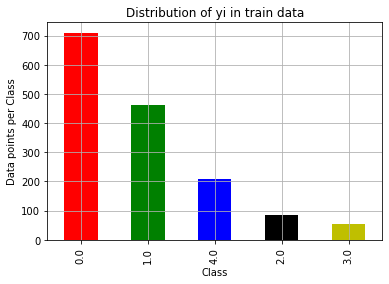

Number of data points in class 0.0 : 710 i.e. 46.68 %
Number of data points in class 1.0 : 461 i.e. 30.309 %
Number of data points in class 4.0 : 210 i.e. 13.807 %
Number of data points in class 2.0 : 85 i.e. 5.588 %
Number of data points in class 3.0 : 55 i.e. 3.616 %


In [426]:
train_class_distribution = train_data['Label'].value_counts()
train_class_distribution.plot(kind='bar', color = ['r', 'g', 'b', 'k', 'y', 'm', 'c'])
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

## Print the distributions in the decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', train_data['Label'].value_counts().keys()[i], ':',train_class_distribution.values[i], 
          'i.e.', 
          np.round((train_class_distribution.values[i]/train_data.shape[0]*100), 3), 
          '%')

In [427]:
# Convert the labels of data as Label 1 and other data Label 0
train_data['Label'].loc[train_data['Label'] != 1] = 0.0

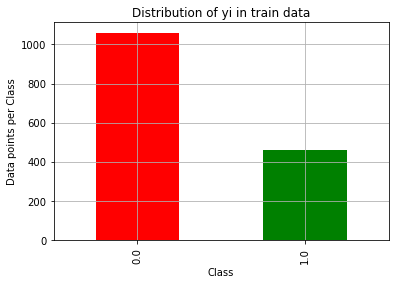

Number of data points in class 0.0 : 1060 i.e. 69.691 %
Number of data points in class 1.0 : 461 i.e. 30.309 %


In [428]:
train_class_distribution = train_data['Label'].value_counts()
train_class_distribution.plot(kind='bar', color = ['r', 'g', 'b', 'k', 'y', 'm', 'c'])
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

## Print the distributions in the decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', train_data['Label'].value_counts().keys()[i], ':',train_class_distribution.values[i], 
          'i.e.', 
          np.round((train_class_distribution.values[i]/train_data.shape[0]*100), 3), 
          '%')

## Text Pre-processing

In [380]:
train_data.head()

Company A  Label
0  ALLEN BRADLEY ROCKWELL AUTOMATION    0.0
1     ALLEN BRADLEY ALLEN BRADLEY CO    1.0
2                CUTLER HAMMER EATON    0.0
3                SKF SKF BEARING IND    1.0
4           ALLENBRADL ALLEN BRADLEY    1.0

In [381]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
# import string library function 
import string 
from nltk.corpus import stopwords

import re
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/fennyzalavadia/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/fennyzalavadia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/fennyzalavadia/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/fennyzalavadia/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [382]:
def convert_to_lower(text):
    return text.lower()
def remove_numbers(text):
    number_pattern = r'\d+'
    without_number = re.sub(pattern=number_pattern, repl=" ", string=text)
    return without_number
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))
def remove_stopwords(text):
    removed = []
    stop_words = list(stopwords.words("english"))
    tokens = word_tokenize(text)
    for i in range(len(tokens)):
        if tokens[i] not in stop_words:
            removed.append(tokens[i])
    return " ".join(removed)
def remove_extra_white_spaces(text):
    single_char_pattern = r'\s+[a-zA-Z]\s+'
    without_sc = re.sub(pattern=single_char_pattern, repl=" ", string=text)
    return without_sc
def lemmatizing(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    for i in range(len(tokens)):
        lemma_word = lemmatizer.lemmatize(tokens[i])
        tokens[i] = lemma_word
    return " ".join(tokens)

In [383]:
train_data['Company A'] = train_data['Company A'].apply(lambda x: convert_to_lower(x))
train_data['Company A'] = train_data['Company A'].apply(lambda x: remove_numbers(x))
train_data['Company A'] = train_data['Company A'].apply(lambda x: remove_punctuation(x))
train_data['Company A'] = train_data['Company A'].apply(lambda x: remove_stopwords(x))
train_data['Company A'] = train_data['Company A'].apply(lambda x: remove_extra_white_spaces(x))
train_data['Company A'] = train_data['Company A'].apply(lambda x: lemmatizing(x))

In [384]:
train_data

Company A  Label
0                     allen bradley rockwell automation    0.0
1                        allen bradley allen bradley co    1.0
2                                   cutler hammer eaton    0.0
3                                   skf skf bearing ind    1.0
4                              allenbradl allen bradley    1.0
...                                                 ...    ...
6918              weiler corporation weiler corporation    1.0
6919                              weldas weldas company    1.0
6924  well lamont industry group well lamont industr...    1.0
6939  worldwide protective product worldwide protect...    1.0
6947            zing enterprise llc zing enterprise llc    1.0

[1521 rows x 2 columns]

In [385]:
# Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
tf_wb= TfidfVectorizer()
X_tf = tf_wb.fit_transform(train_data['Company A'])


In [386]:
X_tf_A

<1521x1011 sparse matrix of type '<class 'numpy.float64'>'
	with 2934 stored elements in Compressed Sparse Row format>

In [387]:
import numpy as np

In [388]:
X_tf = X_tf.toarray()

In [389]:
print(X_tf)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.66048379]]


In [390]:
from sklearn.model_selection import train_test_split

In [391]:
X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(X_tf, train_data['Label'].values, test_size=0.3)

### Gaussian NB

In [392]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train_tf, y_train_tf)
NB_pred= NB.predict(X_test_tf)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test_tf, NB_pred))

0.5645514223194749


In [393]:
# Training classifier model 
clf = SGDClassifier()
clf.fit(X_train_tf, y_train_tf)

# model validation
y_pred = clf.predict(X_test_tf)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred).T)
acc=accuracy_score(y_test,y_pred,normalize=True)*float(100)
print(acc)

              precision    recall  f1-score   support

         0.0       0.69      0.75      0.72       321
         1.0       0.24      0.19      0.21       136

    accuracy                           0.58       457
   macro avg       0.46      0.47      0.46       457
weighted avg       0.55      0.58      0.57       457

[[240 110]
 [ 81  26]]
58.20568927789934


# Handling Imbalance Data

In [394]:
#!pip install imbalanced-learn

In [395]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.metrics import confusion_matrix

In [396]:
X_train, X_test, y_train, y_test = train_test_split(train_data['Company A'], train_data['Label'].values, test_size=0.30)

In [397]:
Counter(y_train)

Counter({0.0: 743, 1.0: 321})

In [398]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train)
X_train_tf = vectorizer.transform(X_train)
X_train_tf = X_train_tf.toarray()
X_test_tf = vectorizer.transform(X_test)
X_test_tf = X_test_tf.toarray()

In [399]:
ROS = RandomOverSampler(sampling_strategy=1)

In [400]:
X_train_ros, y_train_ros = ROS.fit_resample(X_train_tf, y_train)

In [401]:
Counter(y_train_ros)

Counter({0.0: 743, 1.0: 743})

### Gaussian NB

In [402]:
nb = GaussianNB()
nb.fit(X_train_ros, y_train_ros)
y_preds = nb.predict(X_test_tf)

In [403]:
print(accuracy_score(y_test, y_preds)*100)

61.48796498905909


### SGDClassifier

In [404]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report

# Training classifier model 
clf = SGDClassifier()
clf.fit(X_train_ros, y_train_ros)

# model validation
y_pred = clf.predict(X_test_tf)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred).T)
acc=accuracy_score(y_test,y_pred,normalize=True)*float(100)
print(acc)

              precision    recall  f1-score   support

         0.0       0.75      0.79      0.77       317
         1.0       0.45      0.39      0.42       140

    accuracy                           0.67       457
   macro avg       0.60      0.59      0.59       457
weighted avg       0.66      0.67      0.66       457

[[250  85]
 [ 67  55]]
66.73960612691467


## Logistic Regression

In [409]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg.fit(X_train_ros, y_train_ros)
y_pred = logreg.predict(X_test_tf)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred).T)
acc=accuracy_score(y_test,y_pred,normalize=True)*float(100)
print(acc)

              precision    recall  f1-score   support

         0.0       0.77      0.66      0.71       317
         1.0       0.42      0.56      0.48       140

    accuracy                           0.63       457
   macro avg       0.60      0.61      0.60       457
weighted avg       0.67      0.63      0.64       457

[[208  61]
 [109  79]]
62.80087527352297


# Apply model on unseen data

In [480]:
test_data.reset_index(drop=True,inplace = True)
test_data.drop(['Label'],axis = 1,inplace = True)
test_data

Company A                            Company B
0                NATIONAL SEALS/FDM                               TIMKEN
1                    LINK-BELT CORP                                  SKF
2                               SKF                             STANDARD
3                          AIR FLOW                       INGERSOLL RAND
4                     ALLEN BRADLEY                      IFM EFECTOR INC
...                             ...                                  ...
5422        WUHAN CNACC I/E CO. (I)               XIANTAO RAYXIN MEDICAL
5423        WUHAN CNACC I/E CO. (I)        XIANTAO XINFA PLASTIC PROD PO
5424                          WURTH  XINGRONG PROTECTIVE PRODUCTS CO LTD
5425  XIANTAO XINFA PLASTIC PROD PO  XINGRONG PROTECTIVE PRODUCTS CO LTD
5426                           ZING                 ZING ENTERPRISES LLC

[5427 rows x 2 columns]

In [481]:
test_X = test_data.copy()
test_X.reset_index(drop = True,inplace = True)

In [482]:
test_X['Company A'] =  test_X['Company A'] +' ' + test_X['Company B'] 
test_X.drop(['Company B'],axis = 1,inplace = True)

In [483]:
# Preprocess the data ans make prediction
test_X['Company A'] = test_X['Company A'].apply(lambda x: convert_to_lower(x))
test_X['Company A'] = test_X['Company A'].apply(lambda x: remove_numbers(x))
test_X['Company A'] = test_X['Company A'].apply(lambda x: remove_punctuation(x))
test_X['Company A'] = test_X['Company A'].apply(lambda x: remove_stopwords(x))
test_X['Company A'] = test_X['Company A'].apply(lambda x: remove_extra_white_spaces(x))
test_X['Company A'] = test_X['Company A'].apply(lambda x: lemmatizing(x))

In [486]:
# Fit Tf-idf
test_tf = vectorizer.transform(test_X['Company A'])
test_tf = test_tf.toarray()

In [487]:
# Perform Prediction
y_pred = clf.predict(test_tf)

In [488]:
final_df = pd.DataFrame({'Company A':test_data['Company A'],'Company B':test_data['Company B'],'Label' : y_pred})

In [495]:
final_df[final_df['Label'] == 1]

Company A                           Company B  Label
3                          AIR FLOW                      INGERSOLL RAND    1.0
7                               CMS                          PULS-POWER    1.0
10                     REES COMPANY                       REES ELECTRIC    1.0
13                       SIEMENENER               TEXAS INSTRUMENTS INC    1.0
16                              STI                           THERMOELE    1.0
...                             ...                                 ...    ...
5417                    WONDER GRIP        WUXI XINYA GLOVE CO. LTD (I)    1.0
5418                      WORLDWIDE       WORLDWIDE PROTECTIVE PRODUCTS    1.0
5419                      WORLDWIDE  WORLDWIDE PROTECTIVE PRODUCTS (AD)    1.0
5420  WORLDWIDE PROTECTIVE PRODUCTS  WORLDWIDE PROTECTIVE PRODUCTS (AD)    1.0
5426                           ZING                ZING ENTERPRISES LLC    1.0

[2586 rows x 3 columns]

In [499]:
#final_df.to_csv('Label 1.csv',index=False)
final_df.to_excel('Label 1.xlsx',index=False)